## Name : Vineeth Das
## Student Number : 19200227

In [ ]:
# importing the required packages....
import os
import urllib.request
import csv
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import re



## Task 1: Choosing the relevant API
### Two different APIs were choosed for this project provided by BestBuy - https://bestbuyapis.github.io/api-documentation/#response-format
#### The first API is used to return the categories 
#### The second API is used to return the trending products based on the categories

#### The API Key used for this project which I received from BestBuy - api_key = 'AEgiKjbX9RGicnRUVw2EtyyP'

In [2]:
# the API Key received from Best Buy Co Inc. - USA
api_key = 'AEgiKjbX9RGicnRUVw2EtyyP'

# to retrieve the id and name of all the categories contained in BestBuy
api_url = 'https://api.bestbuy.com/v1/categories?format=json&show=id,name&page=40&pageSize=10&apiKey=AEgiKjbX9RGicnRUVw2EtyyP'

# url to retrieve the trending products category vice...
trend_url = 'https://api.bestbuy.com/beta/products/trendingViewed(categoryId=cat02002)?&pageSize=20&show=all&apiKey=AEgiKjbX9RGicnRUVw2EtyyP'



## Task 2: Collect data your chosen API:-

### Bestbuy only allows 100 items to be retrived per search results, so for getting all the 428 pages,
### an additional loop needs to be written, which would select all the pages individually and retrieve the
### ids,name which could then be used to get the rating for the same.


### The below loop will return the details of all the categories in a .json file, which could be lter traversed to get the required details...

In [3]:
# Loop to be run to get the category names and ids 

page = 1

for i in range(40):# range of 40, as there are 40 pages showing the categorization
    if (i == 0):
        with open('categories.json','a',encoding='utf-8') as f:
            f.write('{ "data":[') # adding the extra dict key-value [pair] to update the json with each iterations....
        
    api_url = 'https://api.bestbuy.com/v1/categories?format=json&show=id,name&page='+str(page)+'&pageSize=100&apiKey=AEgiKjbX9RGicnRUVw2EtyyP'
    page +=1
    r = requests.get(api_url)
    data = r.json()
    with open('categories.json','a',encoding='utf-8') as f:
        json.dump(data,f,ensure_ascii=False)
        if(i!=39):
            f.write(',') # adding a comma, to convert the requests (coming in the loop) as value for the pair for easier later iterations
        if(i==39):
            f.write(']}')
    
 

## Task 2.1 : Traversing the last .json file to return the id categories and name
### Storing all categories api related values to a file, and using the below code to seperate them....

In [3]:
with open('categories.json',encoding="utf8") as f_in:
    parsed_json = (json.load(f_in))

# Storing the ids and  names in seperate list for later use...

id_categories = []
id_name = []

for i in range(40): # as there are total 40 pages
    for j in range(100): # and 100 results per page
        ids = parsed_json['data'][i]['categories'][j]['id']
        name = parsed_json['data'][i]['categories'][j]['name']
        id_categories.append(ids) # to add the ids in the respective list
        id_name.append(name) # to add the name in the respective list
        
#example on how to traverse the parsed json file    
#parsed_json['data'][0]['categories'][0]['name']


## Task 3 : getting the details according to the second API and storing the data into a dataframe
### Adding the below logic to get the trending products according to the id categories....

In [3]:
# loop for getting the trends in each of the categories......(no need to run everytime....)
trend_url = 'https://api.bestbuy.com/beta/products/trendingViewed(categoryId=abcat0201000)?&pageSize=20&show=all&apiKey=AEgiKjbX9RGicnRUVw2EtyyP'

for i in range(len(id_categories)):
    if (i == 0):
        with open('trends.json','a',encoding='utf-8') as f:
            f.write('{ "data":[') # adding the extra dict key-value [pair] to update the json with each iterations....
    trend_url = 'https://api.bestbuy.com/beta/products/trendingViewed(categoryId='+(id_categories[i])+')?&pageSize=100&show=all&apiKey=AEgiKjbX9RGicnRUVw2EtyyP'
    r = requests.get(trend_url)
    data_all = r.json()
    with open('trends.json','a',encoding='utf-8') as f:
        json.dump(data_all,f,ensure_ascii=False)
        if(i!=(len(id_categories)-1)):
            f.write(',')  # adding a comma, to convert the requests (coming in the loop) as value for the pair for easier later iterations
        if(i==(len(id_categories)-1)):
            f.write(']}')

            


In [5]:
# Storing all the data in a variable and then storing the same as a DataFrame            
with open('trends.json',encoding="utf8") as f_in:
    parsed_json_all = (json.load(f_in))    
    
# to store all data of the json file as a dataframe for later use....
all_data = pd.DataFrame(parsed_json_all['data'])


## Task 4: Load and represent the data using an appropriate data structure. Apply any pre-processing steps to clean/filter/combine the data

In [6]:
# logic to retrive all the category ids from all_data....

Category_id = pd.Series([]) 
Category_name = pd.Series([])
Sku = pd.Series([])
Product_score = pd.Series([])
Review_count = pd.Series([])
Regular_price = pd.Series([])
Current_price = pd.Series([])
Rank = pd.Series([])
Name = pd.Series([])

Bestbuy = pd.DataFrame()
cid = []
j = 0
for i in range(len(all_data)):
    try:                    # Using Try and Except functionality of python to get only the complete data for each of categories
        for k in range(len(all_data['results'][i])):
            Sku[j] = all_data['results'][i][k]['sku']
            Product_score[j] = all_data['results'][i][k]['customerReviews']['averageScore']
            Review_count[j] = all_data['results'][i][k]['customerReviews']['count']
            Regular_price[j] = all_data['results'][i][k]['prices']['regular']
            Current_price[j] = all_data['results'][i][k]['prices']['current']
            Rank[j] = all_data['results'][i][k]['rank']
            Name[j] = all_data['results'][i][k]['names']['title']
            Category_id[j] = id_categories[i]
            Category_name[j]= id_name[i] 
            j += 1 # to increment the values, such that the entire dataframe rows gets incremented
    except: # this will continue the loop in case if the data is absent for a category
        continue
        
#inserting the looped values to the dataframe columnwise....        
Bestbuy.insert(0,'Category_id',Category_id)    
Bestbuy.insert(1,'Category_name',Category_name)
Bestbuy.insert(2,'SKU',Sku)
Bestbuy.insert(3,'Product Name',Name)
Bestbuy.insert(4,'Rank',Rank)
Bestbuy.insert(5,'Current_price',Current_price)
Bestbuy.insert(6,'Regular_price',Regular_price)
Bestbuy.insert(7,'Product_score',Product_score)
Bestbuy.insert(8,'Review_count',Review_count)
    
# to store the data frame in an excel file....

Bestbuy.to_excel('Bestbuy_trends_categorywise.xlsx')

#### Checking the dataframe for missing values....
### looks like there are no na values


In [17]:
Bestbuy.isna().sum()


Category_id      0
Category_name    0
SKU              0
Product Name     0
Rank             0
Current_price    0
Regular_price    0
Product_score    0
Review_count     0
dtype: int64

#### Top 5 rows in the dataframe

In [19]:
Bestbuy.head(5)

,Category_id,Category_name,SKU,Product Name,Rank,Current_price,Regular_price,Product_score,Review_count
0,abcat0100000,TV & Home Theater,7652031,Chief - Fusion Fixed TV Wall Mount for Most 37...,1,167.99,277.99,0.0,0
1,abcat0100000,TV & Home Theater,6323731,"Samsung - 55"" Class - LED - 7 Series - 2160p -...",2,499.99,499.99,4.7,1730
2,abcat0100000,TV & Home Theater,5979124,Epson - Home Cinema 1060 1080p 3LCD Projector ...,3,549.99,699.99,4.6,467
3,abcat0100000,TV & Home Theater,5855304,Samsung - Streaming 4K Ultra HD Audio Wi-Fi Bu...,4,199.99,299.99,4.7,2591
4,abcat0100000,TV & Home Theater,4314901,Logitech - Harmony Elite (Remote Control and S...,5,254.99,349.99,4.4,3485


### Task 5: Analyse and summarise the cleaned dataset

In [27]:
Bestbuy.describe()

,Rank,Current_price,Regular_price,Product_score,Review_count
count,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000
mean,4.591583,255.367778,311.651176,3.713631,388.837792
std,2.857321,541.846991,637.802533,1.738735,1903.677972
min,1.000000,0.990000,2.990000,0.000000,0.000000
25%,2.000000,31.990000,39.990000,3.900000,2.000000
50%,4.000000,81.990000,99.990000,4.500000,13.000000
75%,7.000000,234.990000,299.990000,4.800000,123.000000
max,10.000000,13099.000000,13399.990000,5.000000,45869.000000


Minimum Value for Rank 1
Maximum value for Rank 10
Minimum Value for Product_score 0.0
Maximum Value for Product_score 5.0
Minimum Value for Review_count 0
Maximum Value for Review_count 45869


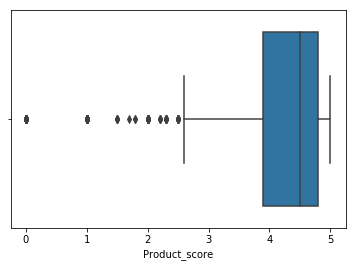

In [391]:
# for Ranks
print("Minimum Value for Rank",min(Bestbuy['Rank']))
print("Maximum value for Rank",max(Bestbuy['Rank']))

# for Product_score

print("Minimum Value for Product_score",min(Bestbuy['Product_score']))
print("Maximum Value for Product_score",max(Bestbuy['Product_score']))

# for Review_count

print("Minimum Value for Review_count",min(Bestbuy['Review_count']))
print("Maximum Value for Review_count",max(Bestbuy['Review_count']))


sns.boxplot('Product_score',data=Bestbuy)

### As we can see from the graph, the 25 and 75 percentiles are scattered around ratings 4 and 5.....

The minimum discount given for a product in BestBuy US is 0.0 %
The maximum discount given for a product in BestBuy US is 85.0 %


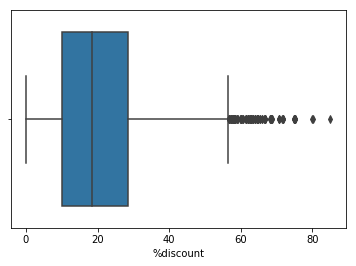

In [51]:
# Ranges of % discount given on the products
# adding one column in the dataset to return the values of discount for the products

Bestbuy['%discount'] = round(((Bestbuy['Regular_price']-Bestbuy['Current_price'])*100/Bestbuy['Regular_price']),2)


#seletd['%discount'] = round(((seletd['Regular_price']-seletd['Current_price'])*100/seletd['Regular_price']))


print("The minimum discount given for a product in BestBuy US is",min(Bestbuy['%discount']),"%")

print("The maximum discount given for a product in BestBuy US is",max(Bestbuy['%discount']),"%")


sns.boxplot('%discount',data=Bestbuy)


### The discounts given to the items are scattered around 15 to 25 % and the mean is around 20 for the same...

###

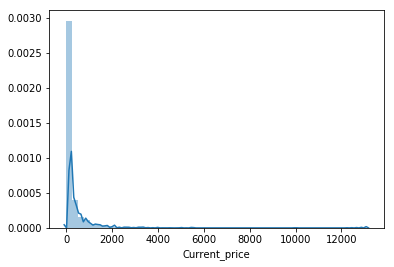

In [52]:
sns.distplot(Bestbuy['Current_price'])

### The distplot shows that the 'Current'prices for products in Bestbuy are skewed towards right....
#### Most of the products have prices between 0 and $2000 

### There are a total of 1019 unique categories in the data set

In [35]:
print(len(Bestbuy['Category_id'].unique()))

1019


## Task 5.1

### As the products mentioned in the Dataset are not categorised into filters, lets start by segregating them according to their names....

In [53]:
# to store the categories into specific subsets for easier calculations

TV_Speakers = Bestbuy['Category_name'].str.contains('TV|Speaker',regex=True)
Gaming  = Bestbuy['Category_name'].str.contains('PS4|Xbox|Nintendo',regex=True)
Apple = Bestbuy['Category_name'].str.contains('Apple|iPad',regex=True)
Computer = Bestbuy['Category_name'].str.contains('PC|Laptop|Computer|Keyboard|Software|Memory|Motherboards|Desktop|Monitor|Headphone|Disk',regex=True)
Car_access = Bestbuy['Category_name'].str.contains('Car',regex=True)
Camera = Bestbuy['Category_name'].str.contains('Camera|Camcorders|Telescopes|Bino|DSLR|flashes',regex=True)
Phone = Bestbuy['Category_name'].str.contains('Cell Phone|Batteries & Chargers|Phone Cases|Telephone Accessories',regex=True)
Office = Bestbuy['Category_name'].str.contains('Office|Desk|Tax|Scanners|Shredders|Ink|Toner|Heater|Air',regex=True)
Kitchen = Bestbuy['Category_name'].str.contains('Kitchen|Cookware|Wash|Machine|Food')
Hygine = Bestbuy['Category_name'].str.contains('Men|Women|Shave|Hair|Oral|Care|Bath|Sleep|Massag')

categories_filter = [TV_Speakers,Gaming,Apple,Computer,Car_access,Camera,Phone,Office,Kitchen,Hygine]
categoties_name = ['TV_Speakers','Gaming','Apple','Computer','Car_access','Camera','Phone','Office','Kitchen','Hygine']




## BestBuy is an electronic  retail giant.... 
### From amoung the different trending categories, we can classify the products as either of the following sub-sections

#### Related to T.V
#### Gaming
#### Mobile phones and accessories
#### Kitchen equipments and related products
#### PC related
#### Cameras and accessories
#### Apple products 
#### Car related products
#### Office related products

##### Lets segregate our data into these categories for better visualization purposes....

## Let's check if the ranking of the products has to do something with the reviews given by the user

In [81]:
# Let us now compare the average review count and product scores category wise....

def average_count(catego,cate_name,rank):
    seletd = Bestbuy[catego][(Bestbuy[catego]).Rank==rank]
    #print("The Average Review_count of ",cate_name, "is",round((seletd['Review_count']).mean(),2),"with Rank",rank)
    x= round((seletd['Review_count']).mean(),2)
    y = cate_name
    plt.xlabel("Categories")
    plt.bar(y,x)
 

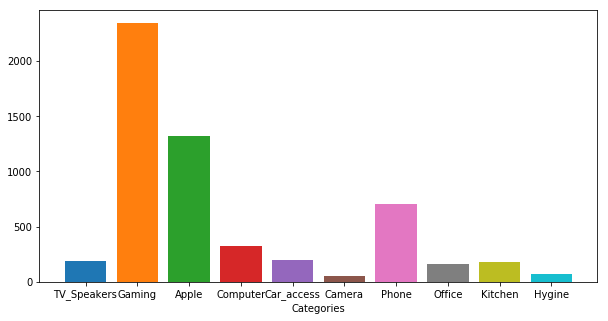

In [82]:
# Graphs for Review count for rank  #1

fig = plt.figure(figsize=(10,5))
for i in range(len(categories_filter)):
    average_count(categories_filter[i],categoties_name[i],1)
    
    #average_count(categories_filter[i],categoties_name[i],2)  
   
    


## The graph shows the average review count for products with Ranking as #1, and as evident from the graph, it ranges from 0 to about 2500....

### Lets plotting the graphs for Ranks #2 and #3  

For Rank# 2


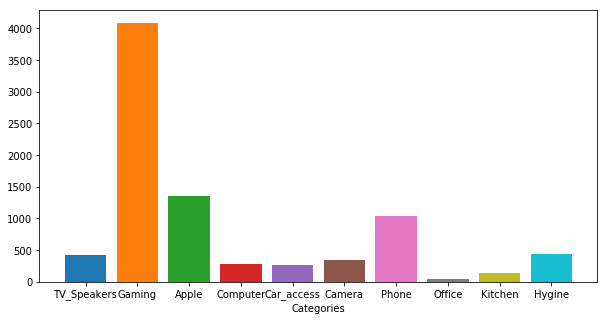

In [83]:
# Graphs for Review count for rank  #2
fig = plt.figure(figsize=(10,5))
for i in range(len(categories_filter)):
    average_count(categories_filter[i],categoties_name[i],2)
print("For Rank# 2")

For Rank# 3


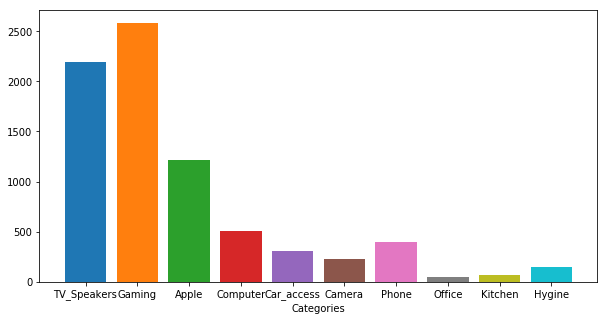

In [84]:
# Graphs for Review count for rank  #3
fig = plt.figure(figsize=(10,5))
for i in range(len(categories_filter)):
    average_count(categories_filter[i],categoties_name[i],3)
print("For Rank# 3")

# One intersting thing to note from the above graphs is that the Trending ranking of the product is independent of the count of reviews received by it, moreover, the products having Rank #1, have fewer reviews received as compared to the Rank #2 and #3 
### Gaming products tend to get more counts of reviews for all rankings...

### On similar lines lets check if the Product Score has any effect on the trending ranks of the Product overall

In [58]:
# Let us now compare the average product score and trending rank....

def average_count(catego,cate_name,rank):
    seletd = Bestbuy[catego][(Bestbuy[catego]).Rank==rank]
    #print("The Average Review_count of ",cate_name, "is",round((seletd['Review_count']).mean(),2),"with Rank",rank)
    x= round((seletd['Product_score']).mean(),2)
    y = cate_name
    plt.bar(y,x)

Rank #1


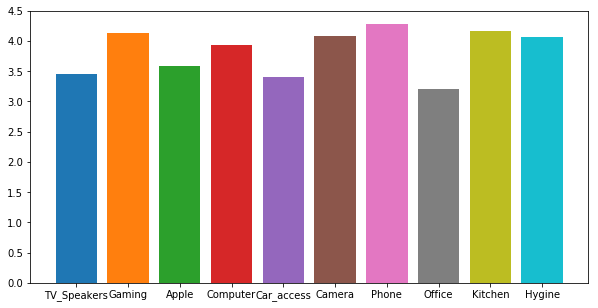

In [59]:
# Graphs for Average Product Score for rank  #1

fig = plt.figure(figsize=(10,5))
for i in range(len(categories_filter)):
    average_count(categories_filter[i],categoties_name[i],1)
print('Rank #1')
    

Rank #2


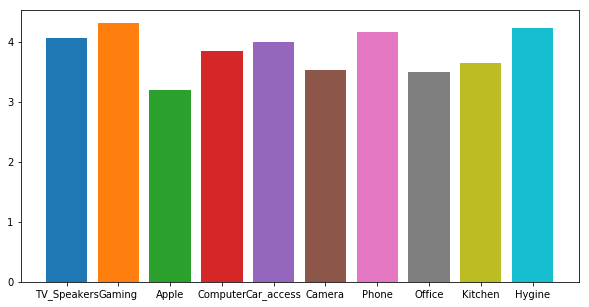

In [60]:
# Graphs for Average Product Score for rank  #2

fig = plt.figure(figsize=(10,5))
for i in range(len(categories_filter)):
    average_count(categories_filter[i],categoties_name[i],2)
print('Rank #2')
     

Rank #3


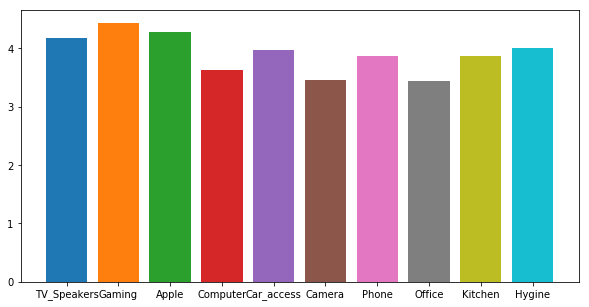

In [61]:
# Graphs for Average Product Score for rank  #3

fig = plt.figure(figsize=(10,5))
for i in range(len(categories_filter)):
    average_count(categories_filter[i],categoties_name[i],3)
print('Rank #3')
     

## All the Ranking #1,#2,#3 show an equal co-realtion between the average customer ratings and the trending ranks, which means that the trending ranks has to be dependent on some other factors than the average rating scored by the user.... 

## Lets now see if the immediate (mean) % discounts offered to the user has any correlation to the ranks of the products...

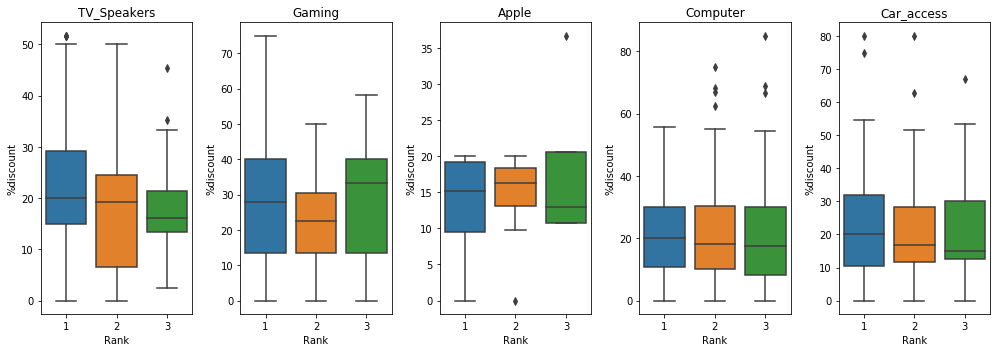

In [62]:
Bestbuy[TV_Speakers][Bestbuy[TV_Speakers].Rank<=3]
fig = plt.figure(figsize=(14,5))
plt.subplot(1, 5, 1)
sns.boxplot(y='%discount',x='Rank',data=Bestbuy[TV_Speakers][Bestbuy[TV_Speakers].Rank<=3]).set_title('TV_Speakers')
plt.subplot(1, 5, 2)
sns.boxplot(y='%discount',x='Rank',data=Bestbuy[Gaming][Bestbuy[Gaming].Rank<=3]).set_title('Gaming')
plt.subplot(1, 5, 3)
sns.boxplot(y='%discount',x='Rank',data=Bestbuy[Apple][Bestbuy[Apple].Rank<=3]).set_title('Apple')
plt.subplot(1, 5, 4)
sns.boxplot(y='%discount',x='Rank',data=Bestbuy[Computer][Bestbuy[Computer].Rank<=3]).set_title('Computer')
plt.subplot(1, 5, 5)
sns.boxplot(y='%discount',x='Rank',data=Bestbuy[Car_access][Bestbuy[Car_access].Rank<=3]).set_title('Car_access')

plt.tight_layout()

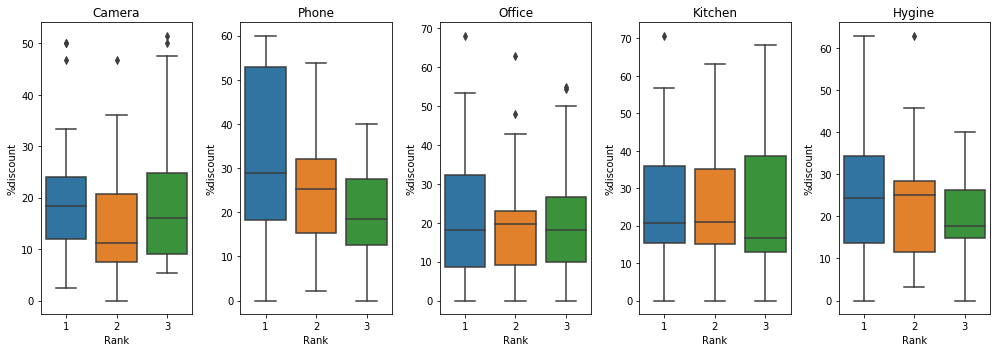

In [63]:
Bestbuy[TV_Speakers][Bestbuy[TV_Speakers].Rank<=3]
fig = plt.figure(figsize=(14,5))
plt.subplot(1, 5, 1)
sns.boxplot(y='%discount',x='Rank',data=Bestbuy[Camera][Bestbuy[Camera].Rank<=3]).set_title('Camera')
plt.subplot(1, 5, 2)
sns.boxplot(y='%discount',x='Rank',data=Bestbuy[Phone][Bestbuy[Phone].Rank<=3]).set_title('Phone')
plt.subplot(1, 5, 3)
sns.boxplot(y='%discount',x='Rank',data=Bestbuy[Office][Bestbuy[Office].Rank<=3]).set_title('Office')
plt.subplot(1, 5, 4)
sns.boxplot(y='%discount',x='Rank',data=Bestbuy[Kitchen][Bestbuy[Kitchen].Rank<=3]).set_title('Kitchen')
plt.subplot(1, 5, 5)
sns.boxplot(y='%discount',x='Rank',data=Bestbuy[Hygine][Bestbuy[Hygine].Rank<=3]).set_title('Hygine')

plt.tight_layout()
#'Camera','Phone','Office','Kitchen','Hygine

### As its quite visible from the boxplot above,TV_Speakers, Gaming, Phone, Office and Hygine products, Tending Rank is based on the amount of discounts provided to the user.....

### On the other hand, for categories of Apple, Camera, Computers,Car accessories, Kitchenware  related products the ranking is independent to the discounts provided, most probably to the fact that either these products have a huge fan base like Apple, so that discounts is not necessary for selling them or customers are more reluntant to buy a product with more features/quality over the discounts offered for the same.

### Using the heat map to get more overview on the correlation of the columns in the dataset

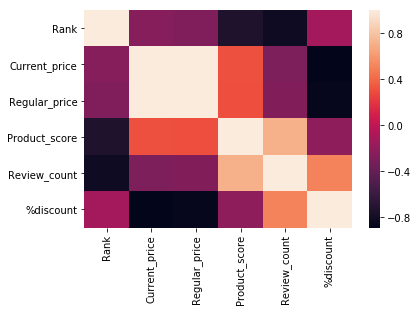

In [79]:
correlation = Bestbuy[4:8].corr()
sns.heatmap(correlation)

#### While reading the above map, one thing that should be noted that is Rank is considered as a numerical (though ordinal)value, meaning for example if we consider the relation between '% discount' and 'rank', it shows that somewhat inversly correlated, it could be interpreted as for lesser rank of products, the % discount is higher....

#### If we consider the review count and the correlation with rank, we have a similar strong inverse relation

#### On the other hand, if we consider the comparison of '%discount' with 'Review_count', there exists a strong direct relation. 



## Tentative conclusion :

#### The data suggests that a product becomes a trending (Rank #1) mostly because of the higher %discount offered, higher review_count and the high product_score it has gained.
#### We were also able to see that amoung the categories of the product, some become treding just because of the discounts offered to them. The category 'Phone' is one of the most prominent amoung them.

#### In general, the products that have secured Rank #1 (or the most trending category) have a more strong relation with %discount offered, counts of reviews and product scores than Rank#2 or Rank#3. 